In [2]:
import sklearn

print(sklearn.__version__)

0.21.3


Dataset used link : https://archive.ics.uci.edu/ml/datasets/diabetes

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

plt.style.use('seaborn-white')

from sklearn.preprocessing import StandardScaler,scale
from sklearn.preprocessing import RobustScaler, robust_scale

In [90]:
df = pd.read_csv('../datasets/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [91]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [93]:
outcome = df['Outcome']

df = df.drop(['Outcome'],axis=1)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


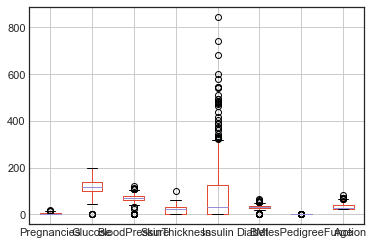

In [94]:
df.boxplot()

#### The series are not in the same scale
The three columns have different ranges and magnitudes due to which the box plot is skewed. Algorithms which use Euclidean Distance measure (e.g. K-means, PCA) are sensitive to magnitudes. Scaling can mitigate this by getting all the features to be weight equally

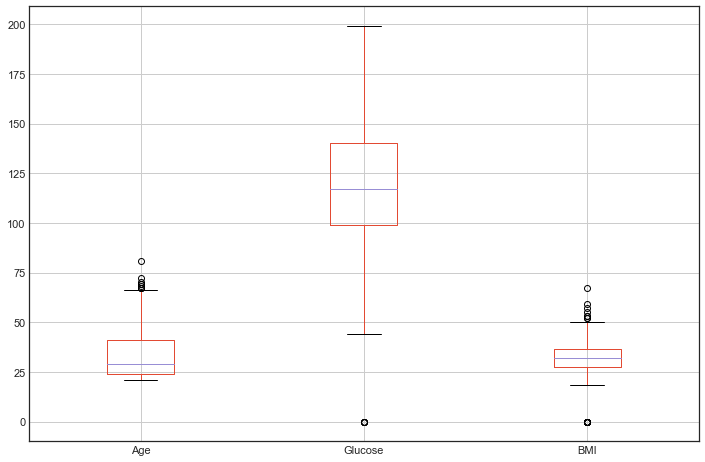

In [95]:
df.boxplot(column=['Age','Glucose','BMI'],figsize=(12,8))
plt.show();

#### The StandardScaler utility class
The scale() function is a quick way to scale data, but the StandardScaler utility class includes that plus other useful functions

In [96]:
std_scaler = StandardScaler(copy=True,with_mean=True,with_std=True)

scaled_array= std_scaler.fit_transform(df)

#### The Rotate argument
The rotation angle for the X labels can be set with the 'rot' property

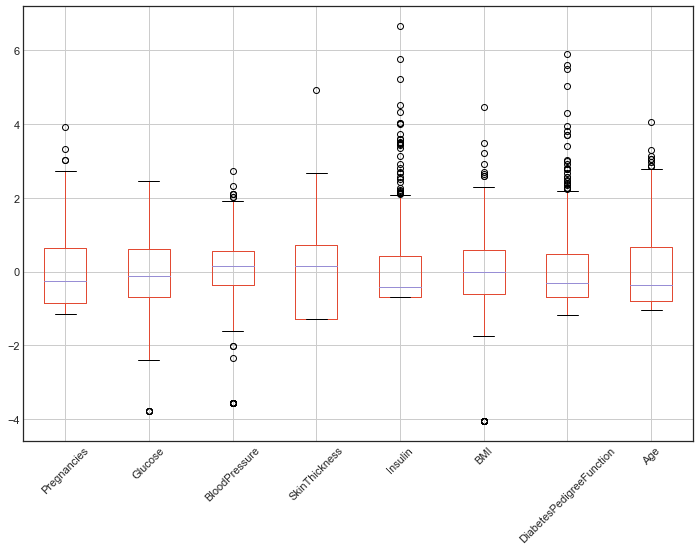

In [97]:
scaled_df = pd.DataFrame(scaled_array,columns=df.columns)

scaled_df.boxplot(figsize=(12,8),rot=45)
plt.show();

In [98]:
scaled_df['Outcome'] = outcome

scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


## Robust Scaler
The values are scaled to be more robust to outliers. For this dataset, the values are similar to standard scaling, but in datasets with outliers which deviate even more from the mean, the results will be more apparent 

In [99]:
df = pd.read_csv('../datasets/diabetes.csv')
df.head(10)

outcome = df['Outcome']
df = df.drop(['Outcome'],axis=1)

In [100]:
robust_scaled_df = pd.DataFrame(RobustScaler(copy=True, with_centering=True, with_scaling=True)\
                                .fit_transform(df),columns=df.columns)

robust_scaled_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294
5,0.4,-0.024242,0.111111,-0.71875,-0.239686,-0.688172,-0.448366,0.058824
6,0.0,-0.945455,-1.222222,0.28125,0.451866,-0.107527,-0.325490,-0.176471
7,1.4,-0.048485,-4.000000,-0.71875,-0.239686,0.354839,-0.623529,0.000000
8,-0.2,1.939394,-0.111111,0.68750,4.027505,-0.161290,-0.560784,1.411765
9,1.0,0.193939,1.333333,-0.71875,-0.239686,-3.440860,-0.367320,1.470588


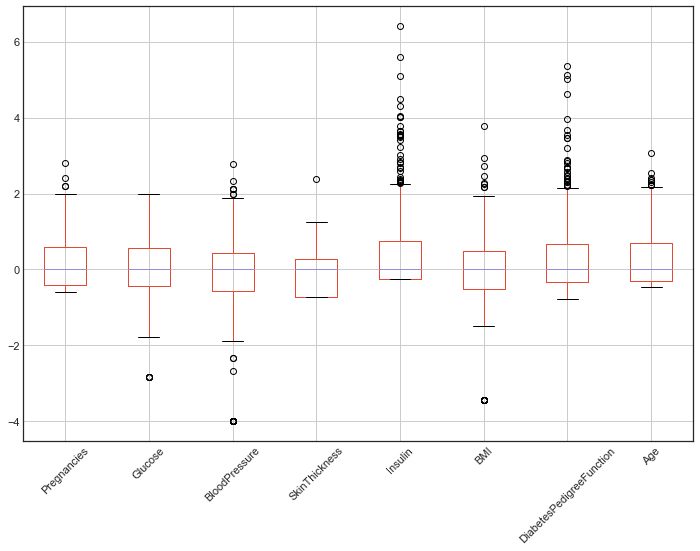

In [101]:
robust_scaled_df.boxplot(figsize=(12,8),rot=45)
plt.show();

In [102]:
robust_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.169010,0.673916,-0.600000,-0.400000,0.0,0.600000,2.800000
Glucose,768.0,0.094413,0.775094,-2.836364,-0.436364,0.0,0.563636,1.987879
BloodPressure,768.0,-0.160807,1.075323,-4.000000,-0.555556,0.0,0.444444,2.777778
SkinThickness,768.0,-0.076986,0.498507,-0.718750,-0.718750,0.0,0.281250,2.375000
Insulin,768.0,0.387422,0.905650,-0.239686,-0.239686,0.0,0.760314,6.408644
BMI,768.0,-0.000798,0.847759,-3.440860,-0.505376,0.0,0.494624,3.774194
DiabetesPedigreeFunction,768.0,0.259807,0.866219,-0.769935,-0.336601,0.0,0.663399,5.352941
Age,768.0,0.249464,0.691778,-0.470588,-0.294118,0.0,0.705882,3.058824


## Normalization

Normalization applies a transformation to each row (sample) in the data so that it fulfils a norm condition. For example, if the value of features in a row are f1, f2, f3...fn then:
* <b>L1 norm:</b> |f1| + |f2| + |f3| ... |fn| = 1
* <b>L2 norm:</b> sqrt(f1<sup>2</sup> + f2<sup>2</sup> + f3<sup>2</sup>...fn<sup>2</sup>) = 1
* <b>Max norm:</b> Each value is expressed as a proportion of a max value in the row

In [103]:
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import Normalizer, normalize

df = pd.read_csv('../datasets/diabetes.csv')
df.head(10)

outcome = df['Outcome']
df = df.drop(['Outcome'],axis=1)

#### L2 norm is the default for the normalize function

In [104]:
l2_normalized_df = pd.DataFrame(normalize(df, norm='l2'), 
                                columns=df.columns)

In [105]:
 l2_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


#### Square the values in Row 0

In [106]:
l2_normalized_df.iloc[0].pow(2)

Pregnancies                 0.001126
Glucose                     0.684963
BloodPressure               0.162110
SkinThickness               0.038307
Insulin                     0.000000
BMI                         0.035304
DiabetesPedigreeFunction    0.000012
Age                         0.078178
Name: 0, dtype: float64

#### Square root of sum of squares of values in Row 0

In [107]:
math.sqrt(l2_normalized_df.iloc[0].pow(2).sum())

1.0

#### Let's pick another random row to check square root of sum of squares

In [108]:
math.sqrt(l2_normalized_df.iloc[13].pow(2).sum())

0.9999999999999999

### Apply L1 norm

In [109]:
l1_normalized_df = pd.DataFrame(normalize(df, norm='l1'), 
                                columns=df.columns)

l1_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.017380,0.428703,0.208558,0.101383,0.000000,0.097327,0.001816,0.144832
1,0.004185,0.355721,0.276207,0.121364,0.000000,0.111320,0.001469,0.129734
2,0.025726,0.588477,0.205806,0.000000,0.000000,0.074926,0.002161,0.102903
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


#### Sum of absolute values should equal 1
In this dataset, all values are positive, so abs() calculation is not required, but included here to illustrate how the L1 norm is calculated

In [110]:
l1_normalized_df.iloc[0].abs().sum()

0.9999999999999998

In [111]:
l1_normalized_df.iloc[31].abs().sum()

1.0

#### Relationships between variables will change after normalization
Scatter plots will look quite different when we plot Insulin levels vs. Glucose readings

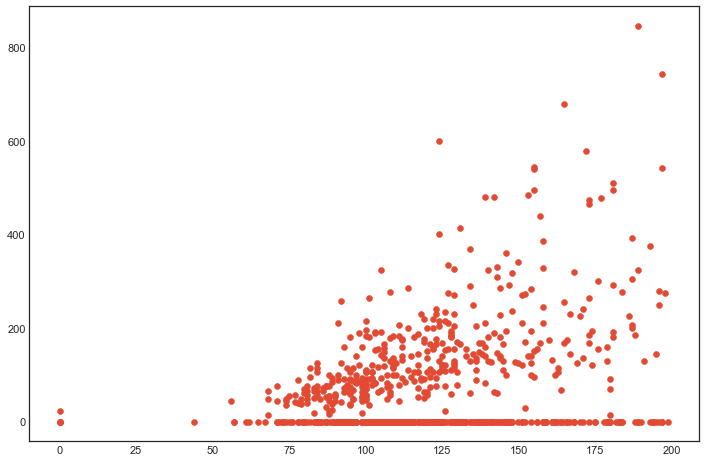

In [112]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x = df['Glucose'], y = df['Insulin'])

plt.show()

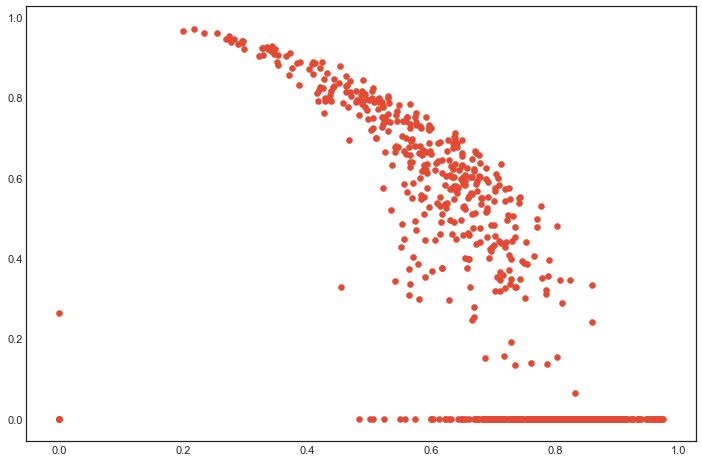

In [113]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x = l2_normalized_df['Glucose'], 
            y = l2_normalized_df['Insulin'])

plt.show()

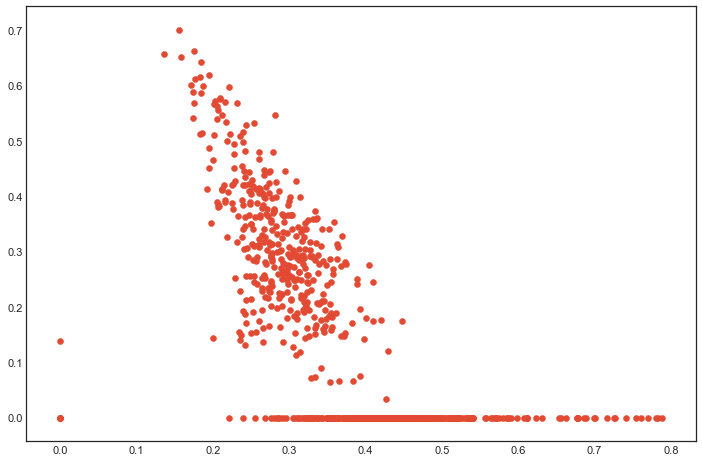

In [114]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x = l1_normalized_df['Glucose'], 
            y = l1_normalized_df['Insulin'])

plt.show()

#### Normalization with Max norm
Each value in a row is expressed as a proportion of the max value. Check original values first

In [115]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### Max Norm applied
The value for the glucose reading is the highest in the first 3 rows, but Insulin is the max value in the next 2

In [116]:
max_normalized_df = pd.DataFrame(normalize(df, norm='max'), 
                                 columns=(df.columns))

max_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.040541,1.000000,0.486486,0.236486,0.0,0.227027,0.004236,0.337838
1,0.011765,1.000000,0.776471,0.341176,0.0,0.312941,0.004129,0.364706
2,0.043716,1.000000,0.349727,0.000000,0.0,0.127322,0.003672,0.174863
3,0.010638,0.946809,0.702128,0.244681,1.0,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.0,0.256548,0.013619,0.196429


#### Manually perform normalization with max norm for Row 0

In [117]:
df.iloc[0]/df.iloc[0].max()

Pregnancies                 0.040541
Glucose                     1.000000
BloodPressure               0.486486
SkinThickness               0.236486
Insulin                     0.000000
BMI                         0.227027
DiabetesPedigreeFunction    0.004236
Age                         0.337838
Name: 0, dtype: float64

### Cosine Similarity
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.

First examine 3 samples from the dataset. Rows 10 and 11 are quite similar to each other (vary in number of pregnancies and glucose levels). Row 8 is quite different from the other 2

In [118]:
df.iloc[[8, 10, 11]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
8,2,197,70,45,543,30.5,0.158,53
10,4,110,92,0,0,37.6,0.191,30
11,10,168,74,0,0,38.0,0.537,34


In [119]:
cosine_similarity(df.iloc[10].values.reshape(1, -1), 
                  df.iloc[11].values.reshape(1, -1))

array([[0.96221582]])

In [120]:
cosine_similarity(df.iloc[8].values.reshape(1, -1), 
                  df.iloc[10].values.reshape(1, -1))

array([[0.34751949]])

In [121]:
cosine_similarity(df.iloc[8].values.reshape(1, -1), 
                  df.iloc[11].values.reshape(1, -1))

array([[0.36851998]])

### Quantile Transformer

In [122]:
import seaborn as sns; 
sns.set(color_codes=True)

from sklearn.preprocessing import QuantileTransformer

In [123]:
store_visits = pd.read_csv('../datasets/store_visits.csv')

store_visits.sample(10)

,Visits,Revenue,StoreID
23,955.083561,4825.417807,1
263,496.275473,704.233856,0
377,527.677753,760.543049,0
382,467.901204,704.053829,0
383,493.180089,792.572381,0
25,1105.927220,5627.636101,1
192,1078.515417,5478.577087,1
201,471.303986,715.629380,0
362,483.599387,634.571368,0
102,1004.773715,5047.868573,1


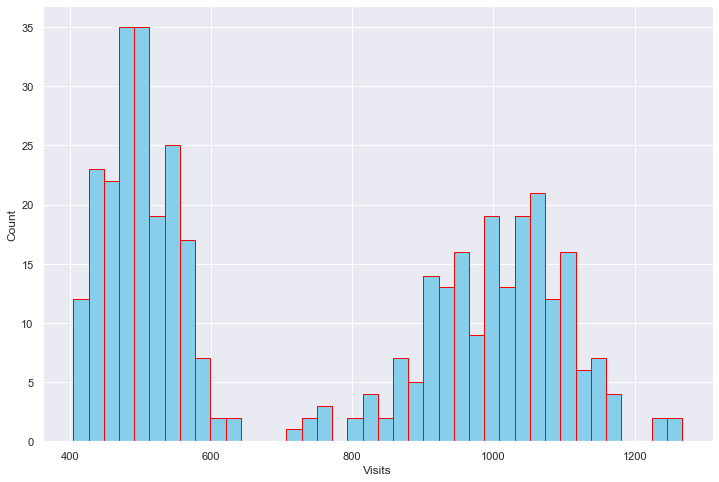

In [124]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Visits'], 
         facecolor='skyblue', 
         edgecolor='red', 
         bins=40)

plt.xlabel('Visits')
plt.ylabel('Count')

plt.show()

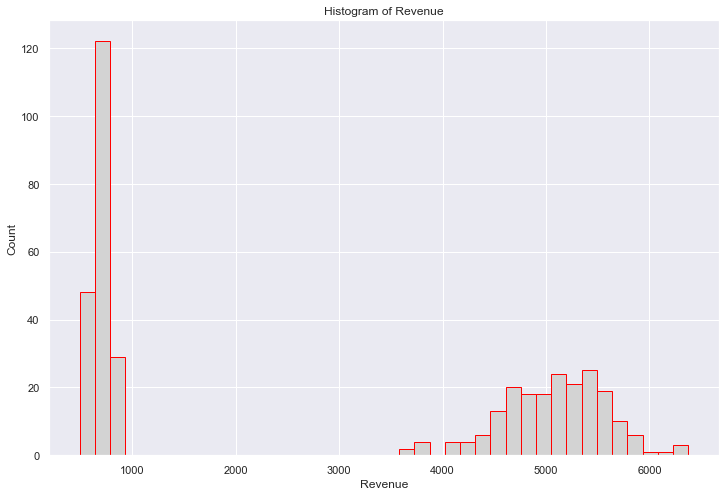

In [125]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Revenue'], 
         facecolor='lightgrey', 
         edgecolor='red', 
         bins=40)

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

In [126]:
transformer = QuantileTransformer(output_distribution='normal', n_quantiles=200)

store_transform = transformer.fit_transform(store_visits[['Visits','Revenue']])

In [127]:
store_transform_df = pd.DataFrame(data = store_transform,
                                  columns=['Visits_transform', 'Revenue_transform'])
store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.689662,0.733025
1,0.990498,0.989974
2,0.315277,0.334061
3,0.370619,0.426712
4,1.221233,1.245011


In [128]:
final_df = pd.concat([store_visits, store_transform_df], axis=1)

final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.689662,0.733025
1,1058.607260,5349.036298,1,0.990498,0.989974
2,935.069490,4756.347453,1,0.315277,0.334061
3,952.360965,4849.804826,1,0.370619,0.426712
4,1078.384010,5467.920052,1,1.221233,1.245011


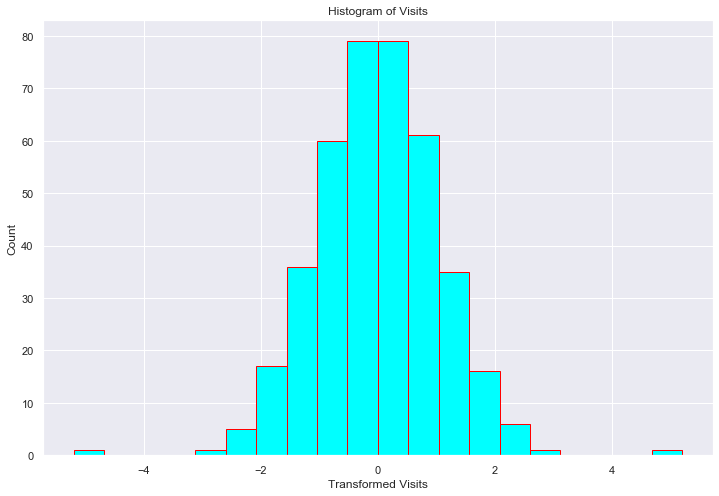

In [129]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Visits_transform'], 
         facecolor='cyan', 
         edgecolor='red', 
         bins=20)

plt.xlabel('Transformed Visits')
plt.ylabel('Count')
plt.title('Histogram of Visits')

plt.show()

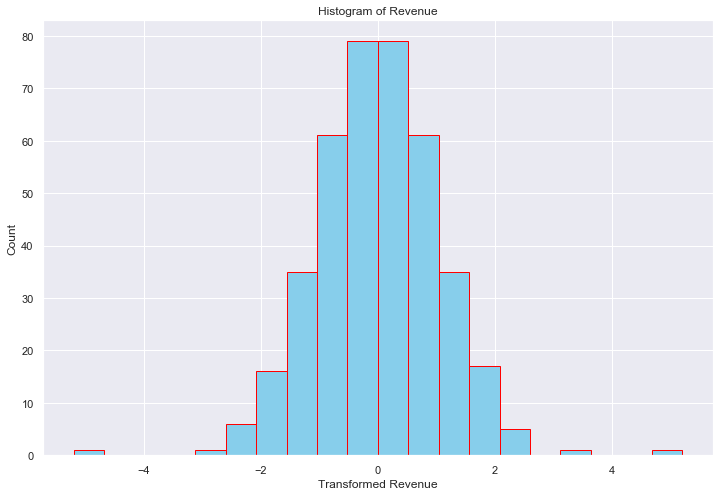

In [130]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Revenue_transform'], 
         facecolor='skyblue', 
         edgecolor='red', 
         bins=20)

plt.xlabel('Transformed Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

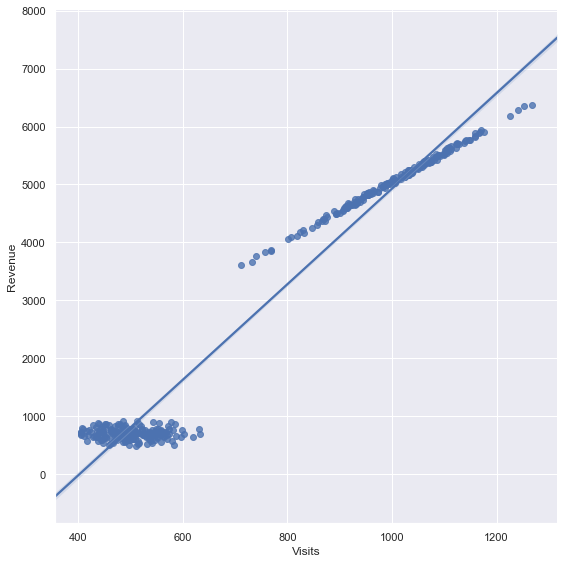

In [131]:
sns.lmplot(x="Visits", 
           y="Revenue", 
           data=final_df, 
           height=8)

plt.show()

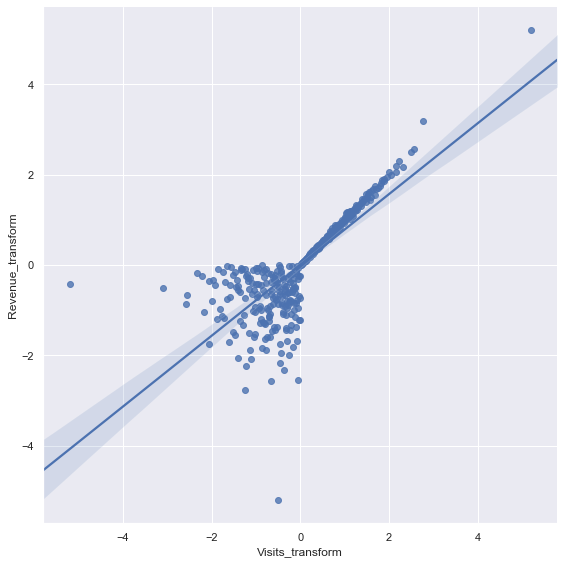

In [132]:
g = sns.lmplot(x="Visits_transform", 
               y="Revenue_transform", 
               data=final_df, 
               height=8)

plt.show()

# Feature Selection using Factor Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

In [133]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import FactorAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#### Load and explore pre-processed data
This was standard scaled previously

In [134]:
df = pd.read_csv('../datasets/diabetes_processed.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [135]:
FEATURES = list(df.columns[:-1])

FEATURES

LABEL = 'Outcome'

## Build Model

In [136]:
def build_model(n_components):
    
    X = df[FEATURES]
    Y = df[LABEL]
    
    fa_obj = FactorAnalysis(n_components = n_components, 
                            random_state = 10, 
                            max_iter=10000)
    
    x_new = fa_obj.fit_transform(X, Y)
    X = pd.DataFrame(x_new)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = LogisticRegression(solver = 'liblinear', 
                               max_iter=1000)
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test' : y_test,
                                 'y_pred' : y_pred})
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return {'fact_a_obj' : fa_obj,
            'transform_x' : X,
            'accuracy': acc, 
            'precision' : prec,
            'recall' : recall}    

### Helper function to compare the results

In [137]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test: ', key)

        print()
        print("accuracy_score : ", result_dict[key]['accuracy'])
        print("precision_score : ", result_dict[key]['precision'])
        print("recall_score : ", result_dict[key]['recall'])
       
        print()

### Helper function to visualize the results

In [138]:
def visualize_results(result_dict):
    
    n_components = list(range(0, 8))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]

    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Precision')
    plt.plot(n_components, recall, label='Recall')

    plt.xlabel('n components')
    plt.ylabel('score');
    
    plt.legend()
    
    plt.show()

In [139]:
result_dict = {}
    
for i in range (1, 9):
    result_dict['n_components - ' + str(i)] = build_model(i)

In [140]:
compare_results(result_dict)

Test:  n_components - 1

accuracy_score :  0.7077922077922078
precision_score :  0.8461538461538461
recall_score :  0.2037037037037037

Test:  n_components - 2

accuracy_score :  0.6623376623376623
precision_score :  0.6451612903225806
recall_score :  0.32786885245901637

Test:  n_components - 3

accuracy_score :  0.7077922077922078
precision_score :  0.6
recall_score :  0.40384615384615385

Test:  n_components - 4

accuracy_score :  0.7207792207792207
precision_score :  0.6
recall_score :  0.5660377358490566

Test:  n_components - 5

accuracy_score :  0.7597402597402597
precision_score :  0.7446808510638298
recall_score :  0.5833333333333334

Test:  n_components - 6

accuracy_score :  0.7597402597402597
precision_score :  0.7916666666666666
recall_score :  0.5846153846153846

Test:  n_components - 7

accuracy_score :  0.7467532467532467
precision_score :  0.75
recall_score :  0.5409836065573771

Test:  n_components - 8

accuracy_score :  0.7272727272727273
precision_score :  0.6428571

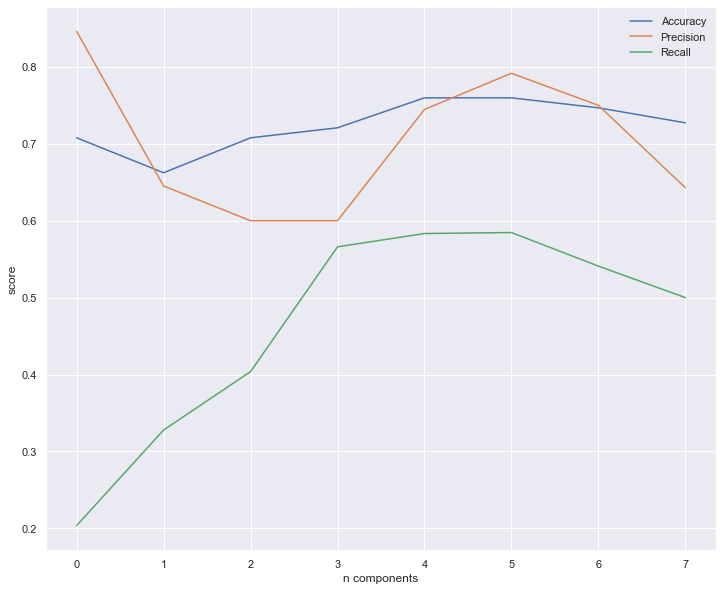

In [141]:
visualize_results(result_dict)